**Exercice : détection de fenêtres anormales dans un avion**

Les données fournies sont des mesures de paramètres divers des fenêtres d'avions, organisées par jour, par cycle, par fenêtre de temps.

On nous demande de détecter les fenêtres de temps qui sont anormales.

On suppose que le jeu de données contient des fenêtres anormales, on utilisera donc une méthode de détection d'outliers. 
Il faudra réfléchir à une manière d'agréger les données par fenêtre : par exemple, déclarer une fenêtre comme anormale si un nombre suffisant de ses points est considéré comme des outliers.

Une fois l'algorithme choisi et entraîné, il faudra voir avec l'ingénieur aero comment fixer les seuils de décions : sait-on la proportion de fenêtres comportant des anomalies ?
 

In [9]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
import seaborn as sns

  day_cycle_window        p1        p2        p3        p4        p5       p6  \
0            1_1_1 -0.805191 -1.141993 -1.328327 -1.516693 -1.373962 -0.80827   
1            1_1_1 -0.805191 -1.134902 -1.320393 -1.505848 -1.361560 -0.80784   
2            1_1_1 -0.805191 -1.117304 -1.307167 -1.505848 -1.361560 -0.80784   
3            1_1_1 -0.814231 -1.114206 -1.287593 -1.442302 -1.287565 -0.80784   
4            1_1_1 -0.848104 -1.112276 -1.285393 -1.429076 -1.270722 -0.80784   

         p7        p8        p9       p10       p11  
0 -1.070547 -0.504352  2.807146  0.495528 -1.246737  
1 -1.064212 -0.516000  2.894177  0.494467 -1.244472  
2 -1.064212 -0.516000  2.981904  0.429370 -1.244472  
3 -1.045557 -0.516000  3.063298  0.348056 -1.244472  
4 -1.017575 -0.664906  3.049237  0.118828 -1.270237  


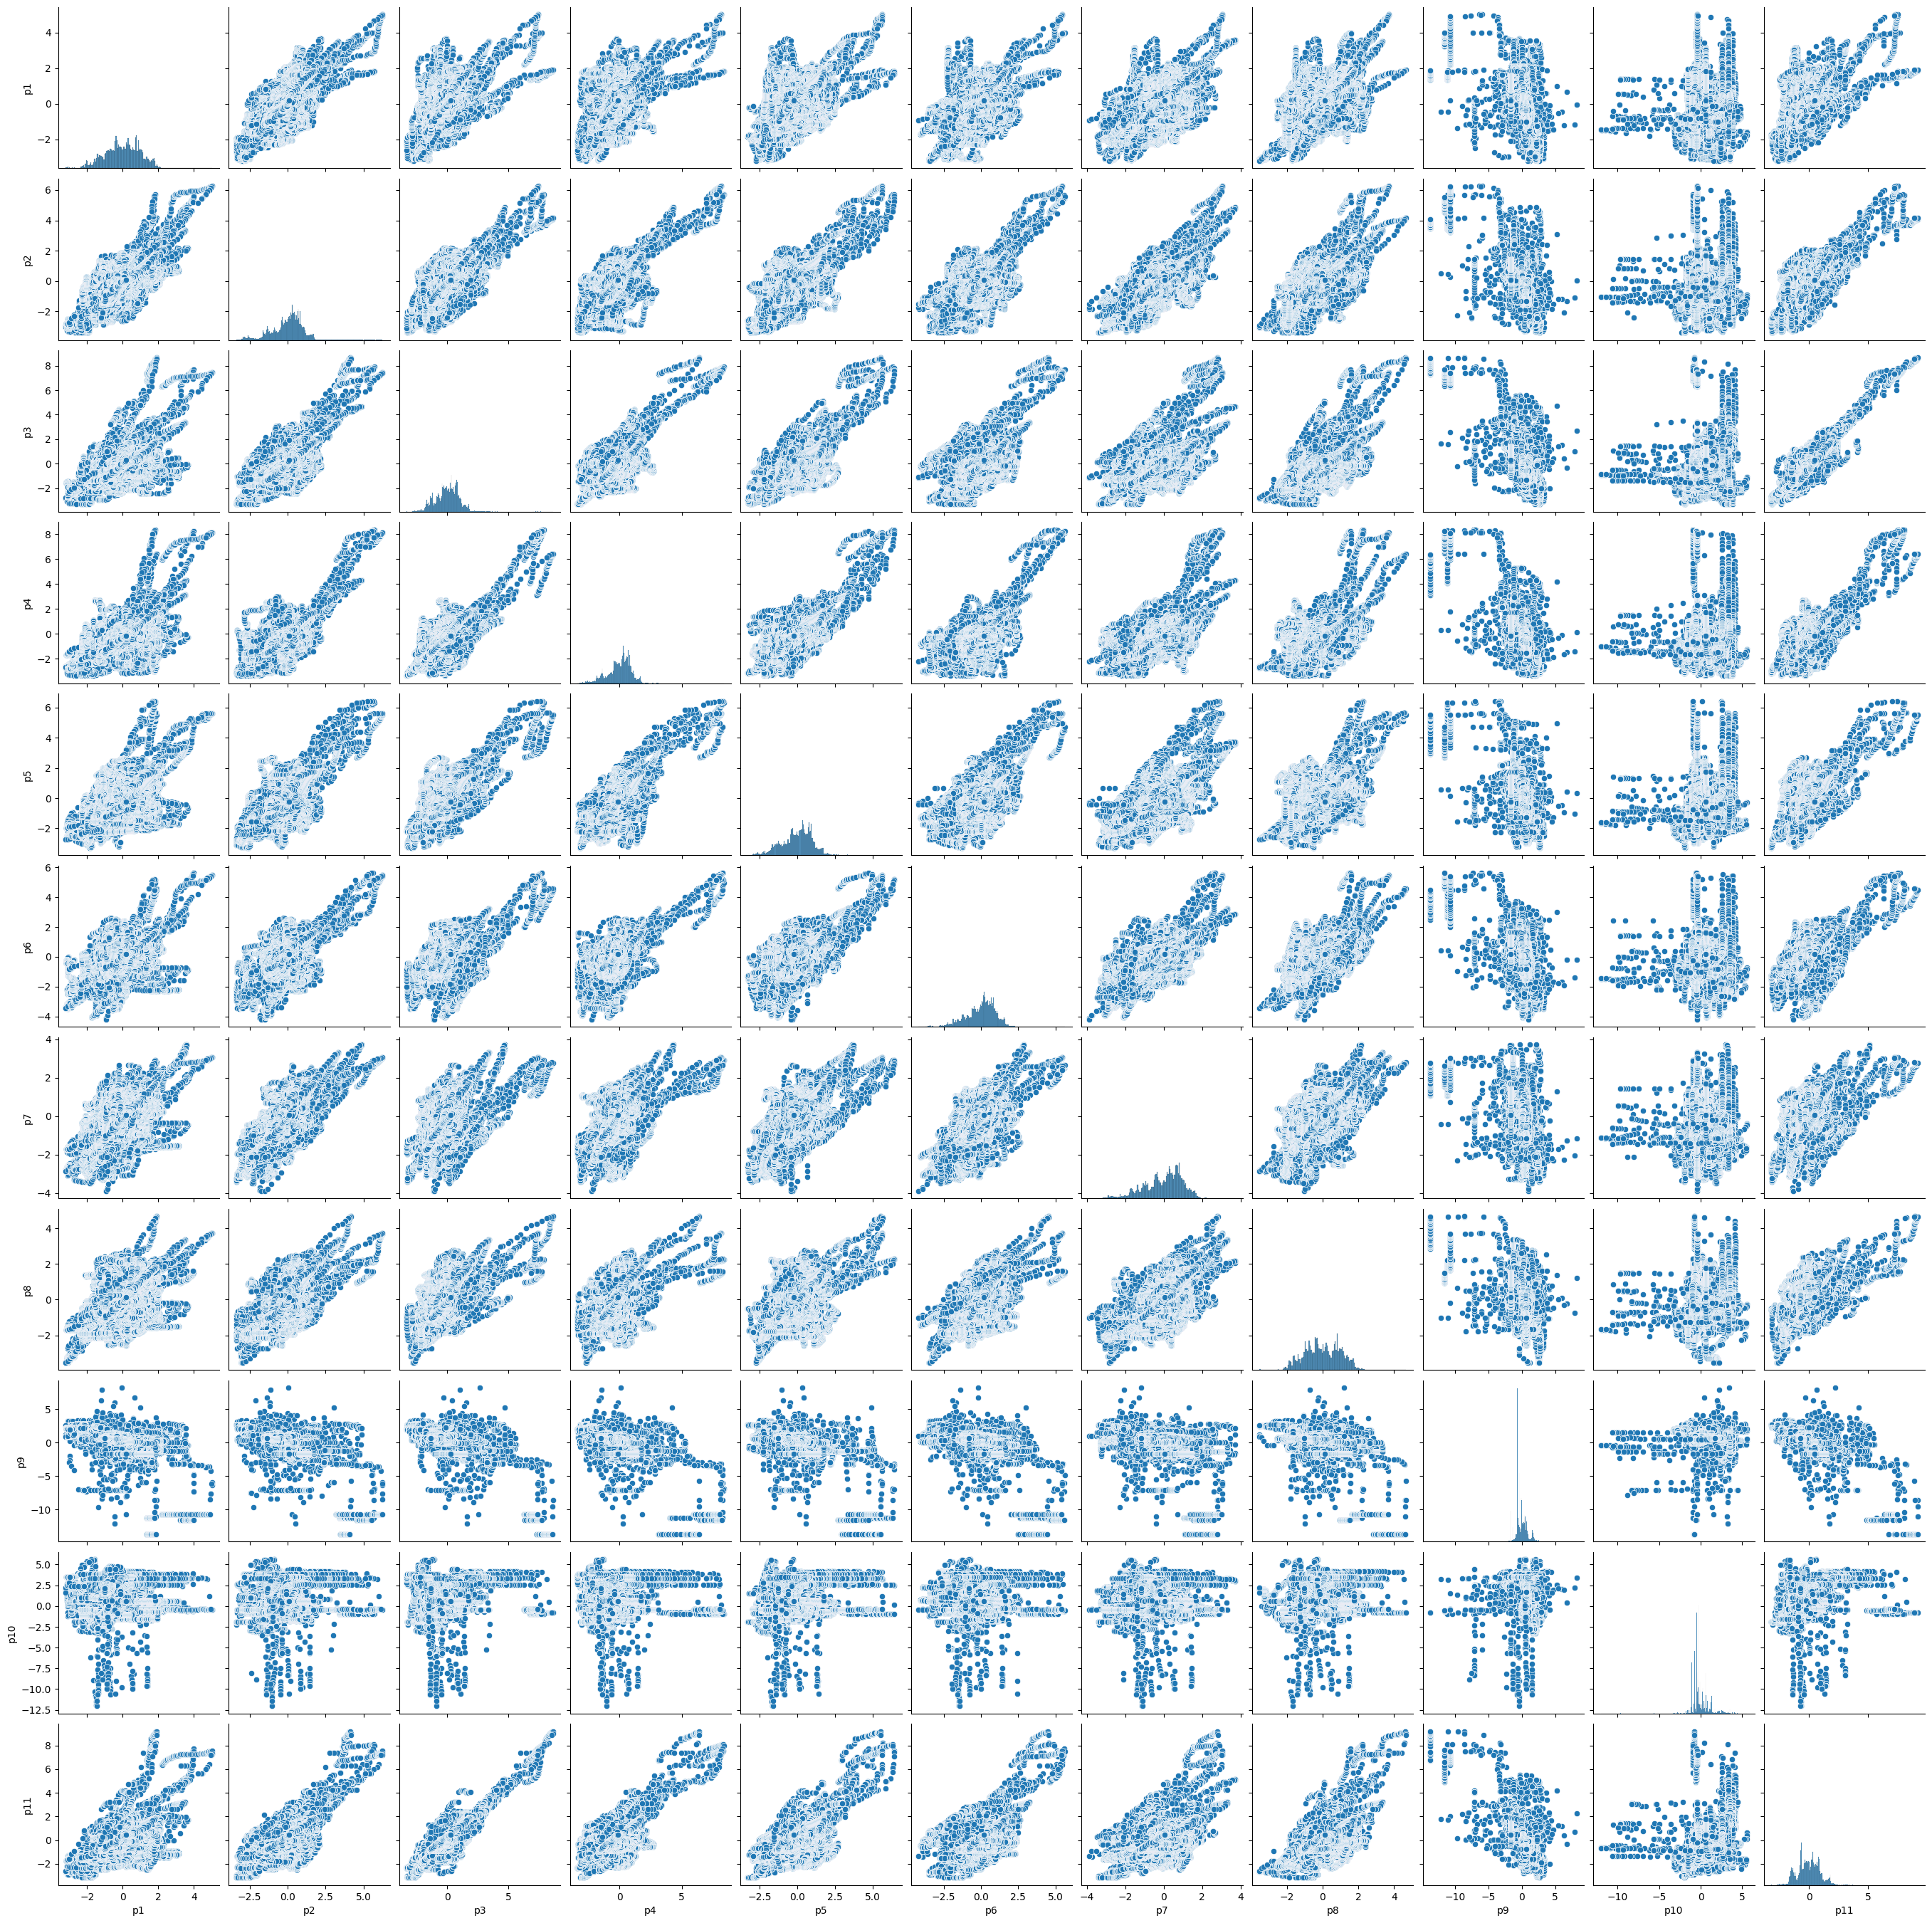

In [10]:
df = pd.read_csv('./data/dataset.csv')
print(df.head())

sns.pairplot(df)
plt.show()

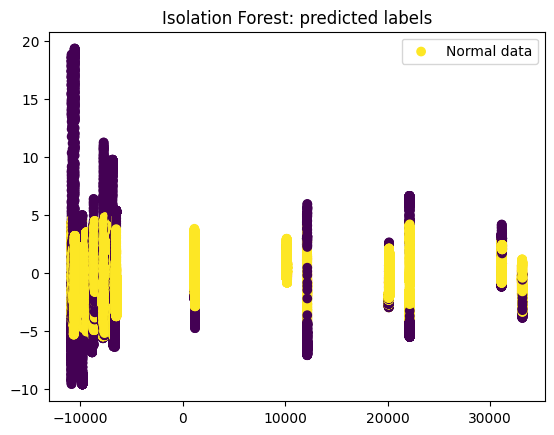

In [13]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(n_estimators=100, contamination=0.1)
clf.fit(df) 
ypred = clf.predict(df)
# plot results
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
plt.scatter(x=df_pca[:,0],y=df_pca[:,1],c=ypred)
plt.title('Isolation Forest: predicted labels')
plt.legend(['Normal data','Anomalies'])
plt.show()